# Regresión lineal
$$
y = \underbrace{\beta_0}_\text{Intercepto} + \underbrace{\beta_1}_\text{Coeficiente 1} x_1 + \underbrace{\beta_2}_\text{Coeficiente 2}  x_2 + \underbrace{\beta_3}_\text{Coeficiente 3}  x_3 + \underbrace{\beta_4}_\text{Coeficiente 4}  x_4 
$$


### Conceptos.

1. El término *regresión lineal* se refiere a que el modelo es lineal en sus parámetros:
$$
\beta_1,\beta_2,\beta_3....\beta_i
$$

2. Las variables: 
$$
x_1,x_2,x_3...x_i
$$
reciben el nombre de variables independientes o explicativas. 

3. La variable:  **y**  recibe el nombre de variable dependiente o explicada.


### Supuestos

1. **Independencia de los errores:** los errores son independientes entre sí. No deben estar correlacionados. 
2. **Homoscedasticidad** (varianza constante del error): La varianza de los errores es constante para todos los valores de X.
3. **Normalidad de los errores:** Los errores siguen una distribución normal(esto es importante para hacer inferencia, no tanto para estimar β).
5. **No multicolinealidad** (en regresión múltiple): Las variables independientes no deben estar fuertemente correlacionadas entre sí.

# Ejemplo introductorio

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [21]:
# Definir los valores posibles y sus probabilidades

# 1. Generar datos correctamente
np.random.seed(42)
s = 1000

df = pd.DataFrame({
    'MetrosCuadrados': np.random.randint(30, 110, s),
    'Planta': np.random.randint(1, 11, s),
    'DistanciaPlaya_km': np.random.randint(1, 11, s)
})

# Coeficientes balanceados
df['Precio'] = (
    2000 +
    3500 * df['MetrosCuadrados'] +
    2500 * df['Planta'] -
    500  * df['DistanciaPlaya_km'] +
    np.random.normal(0, 1000, s)*2  # Ruido SD=1000
)

# 2. Guardar sin índice (esto es crucial)
df.to_csv("data/PrecioVivienda.csv", index=False)

In [22]:
# Leer los datos
data = pd.read_csv("data/PrecioVivienda.csv")
data

,MetrosCuadrados,Planta,DistanciaPlaya_km,Precio
0,81,5,9,292955.144598
1,44,5,8,164350.178311
2,101,10,1,381153.676336
3,90,4,6,319216.556685
4,50,6,9,184966.211057
...,...,...,...,...
995,69,8,3,264730.297524
996,70,5,3,259729.059817
997,40,1,9,143037.773163
998,52,4,7,190659.952990


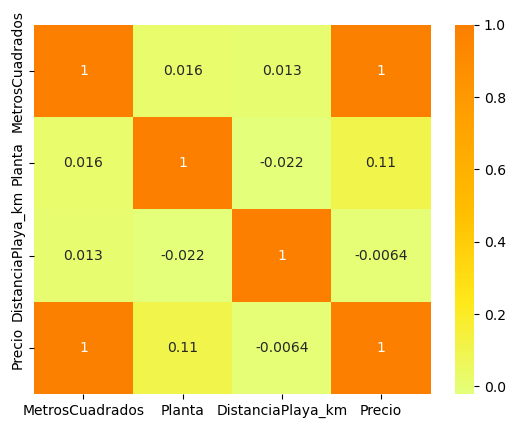

In [23]:
# Generar un diagrama de calor para observar la correlación entre variables
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [24]:
# Separar las variables explicativas y la objetivo
X = data.drop('Precio', axis=1)
y = data['Precio']

## Escalado (Standardization)
$$ z = \frac{x - \mu}{\sigma} $$

In [25]:
# Escalar características (opcional pero recomendado)
# Manualmente (ejemplo)
#X_train_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#X_train_sm = sm.add_constant(X_train_scaled)                   # Añadir intercepto

# Usando sklearn

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
# 7. Dividir datos (usando datos escalados)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  # Usar datos escalados
                                                           y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [27]:
# 8. Añadir constante para statsmodels
X_train_sm = sm.add_constant(X_train)

In [28]:
# 9. Entrenar modelo
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.157e+05
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:24:11   Log-Likelihood:                -7229.9
No. Observations:                 800   AIC:                         1.447e+04
Df Residuals:                     796   BIC:                         1.449e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.515e+05     72.18

## Diagnostico
0. **Linealidad**: Gráfico de residuos vs predichos → no debe haber forma curva.
1. **Independencia de los errores:** Test de Durbin-Watson (valor cercano a 2 indica independencia). 
2. **Homoscedasticidad** Test de Breusch-Pagan o White.
3. **Normalidad de los errores:** Test de normalidad: Shapiro-Wilk, Jarque-Bera.
5. **No multicolinealidad** Matriz de correlación. VIF (Variance Inflation Factor): valores > 10 indican alta colinealidad.

### Información general del modelo


| Elemento                          | Valor                        | Interpretación                                                          |
| --------------------------------- | ---------------------------- | ----------------------------------------------------------------------- |
| **Modelo**                        | OLS (Ordinary Least Squares) | Regresión lineal clásica, minimiza la suma de cuadrados de los errores. |
| **Dependiente**                   | `Precio`                     | Estamos modelando el precio de la vivienda.              |
| **N. observaciones**              | 800                          | Tamaño de la Muestra.                                                 |
| **Grados de libertad (modelo)**   | 3                            | Tres variables independientes.                                          |
| **Grados de libertad (residuos)** | 796                          | 800 - 3 - 1 (constante)                                                 |


### Calidad del modelo

| Métrica                | Valor  | Interpretación                                                            |
| ---------------------- | ------ | ------------------------------------------------------------------------- |
| **R-squared**          | 0.999  | El modelo explica el **99.9% de la varianza** de la variable dependiente. |
| **Adj. R-squared**     | 0.999  | También 0.999.Están las variables que son.     |
| **F-statistic**        | 415700 | Prueba global de significancia: extremadamente alto.                      |
| **Prob (F-statistic)** | 0.000  | El modelo es **estadísticamente significativo en conjunto**.              |


### Coeficientes y Significancia

| Prueba                    | Valor        | Interpretación                                                                 |
| ------------------------- | ------------ | ------------------------------------------------------------------------------ |
| **Durbin-Watson**         | 2.052        | Cerca de 2 → los errores **no están autocorrelacionados** (supuesto cumplido). |
| **Omnibus** / **JB Test** | p = 0.270    | Prueba de normalidad de residuos → p > 0.05 → **normalidad aceptada**.         |
| **Skew / Kurtosis**       | -0.140 / \~3 | Distribución de errores **simétrica y normal**.                                |
| **Cond. No. (Condición)** | 1.04         | **No hay colinealidad** severa entre variables (Esto sería excelente).         |


**Conclusiones generales:**

✅ El modelo cumple los supuestos clásicos de independencia y normalidad de errores.

✅ Los coeficientes son significativos: Todas las variables aportan valor al modelo.

✅ No hay multicolinealidad: Condición del número muy baja.

🚨 R² muy alto, hay que comprobar que no haya overfitting.

**Falta:**

🚨 Linealidad.

🚨 Homocedasticidad.

### Vamos a hacer las prediciones con el modelo

In [29]:
# Predicciones
y_train_pred_ols = ols_model.predict(X_train_sm)
X_test_sm        = sm.add_constant(X_test)
y_test_pred_ols  = ols_model.predict(X_test_sm)

## Linealidad

### Gráfico de residuos vs predichos → no debe haber forma curva.

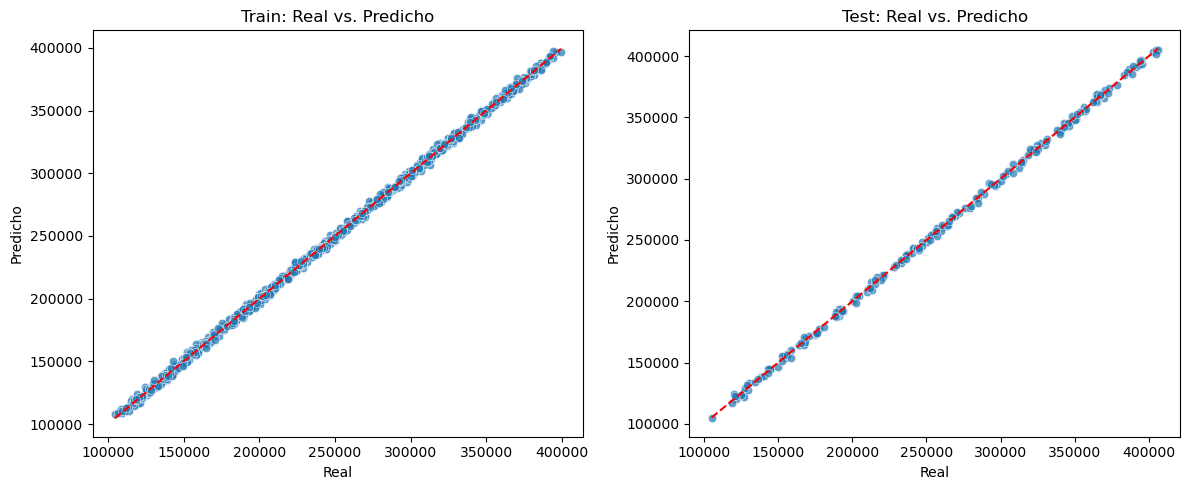

In [34]:
# ---------- Visualizaciones ---------- #
# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ols, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ols, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

### Homocedasticidad

Al Graficar los residuos (error = real − predicho) en el eje Y, contra los valores predichos en el eje X, debe mostrarse
una nube dispersa sin forma ni patrón 

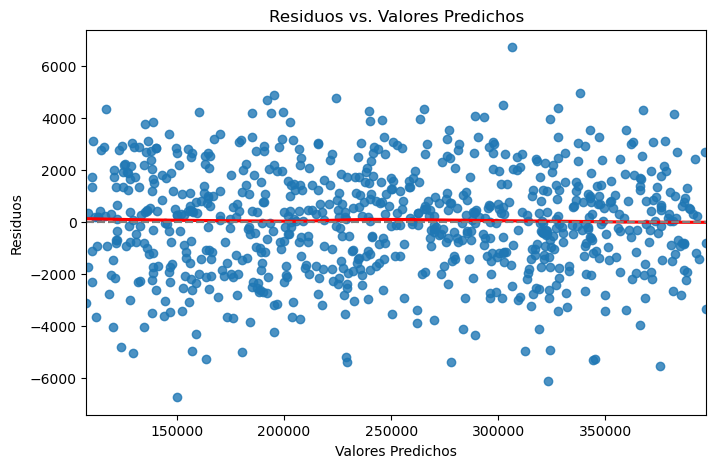

In [35]:
# Residuos vs. Valores ajustados
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.show()

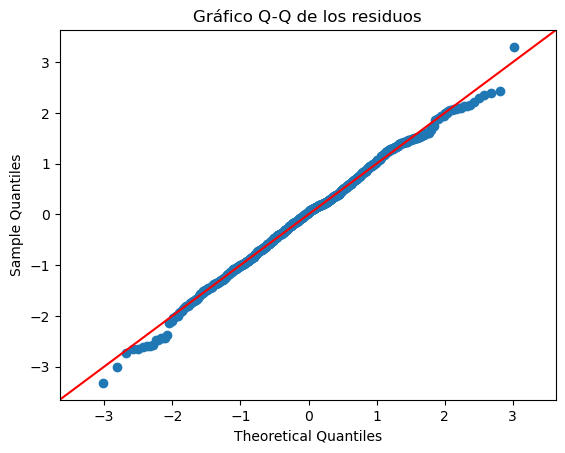

In [36]:
# 4. Q-Q PLOT ( Otra manera de verificar la normalidad de los residuos)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

## 🚨 Los Coeficientes hallados, están escalados, no son los reales de la regresión.

$$
y = \beta_0 + \beta_1 z = \beta_0 + \beta_1 \left( \frac{X - \mu}{\sigma} \right) = \underbrace{\left( \beta_0 - \frac{\beta_1 \mu}{\sigma} \right)}_{\text{Nuevo intercepto}} + \underbrace{\left( \frac{\beta_1}{\sigma} \right)}_{\text{Nueva pendiente}} X
$$

## Ajuste de coeficientes
$$ \beta_0^{\text{original}} = \beta_0^{\text{escalado}} - \sum_{i=1}^n \left( \beta_i^{\text{escalado}} \cdot \frac{\mu_i}{\sigma_i} \right) $$

$$ \beta_i^{\text{original}} = \frac{\beta_i^{\text{escalado}}}{\sigma_i} $$

In [559]:
# Obtener los coeficientes originales.
scaler_means = scaler.mean_
scaler_stds = np.sqrt(scaler.var_)

intercepto_original  = ols_model.params.iloc[0] - np.sum(ols_model.params.iloc[1:] * scaler_means / scaler_stds)
coef_metros_original = ols_model.params.iloc[1] / scaler_stds[0]
coef_planta_original = ols_model.params.iloc[2] / scaler_stds[1]
coef_dist_original   = ols_model.params.iloc[3] / scaler_stds[2]

In [598]:
print("Intercepto_original:", intercepto_original)
print("Coef_metros_original:",coef_metros_original)    
print("Coef_planta_original:",coef_planta_original)
print("Coef_dist_original:  ",coef_dist_original) 

Intercepto_original: 2275.5945656426484
Coef_metros_original: 3501.207126529202
Coef_planta_original: 2464.2223868159663
Coef_dist_original:   -511.51144658748916


## Ahora con datos reales

In [608]:
# Leer los datos
data = pd.read_csv("data/Fish.csv")

In [609]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Parte 2, filtrando las variables correlacionadas

In [610]:
# Codificar la variable categórica 'Species'
species_dummies = pd.get_dummies(data['Species'], prefix='Species').astype(int)
data = data.drop('Species', axis=1)
data = pd.concat([data, species_dummies], axis=1)
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

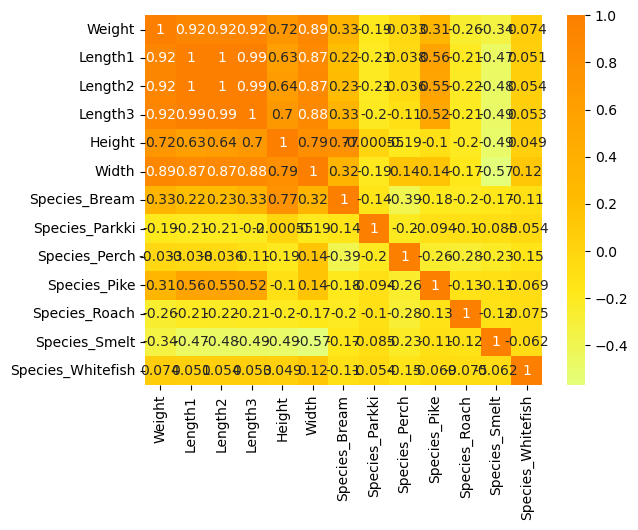

In [611]:
# Observar las variables correlacionadas
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

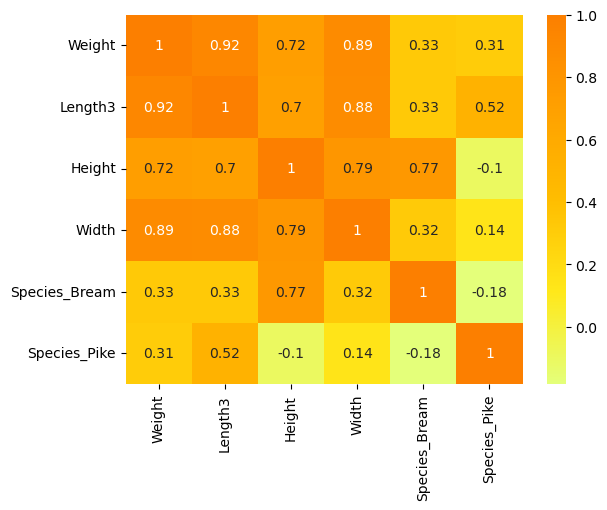

In [612]:
# correlation plot
# Vamos a mantner las columnas 'Length3', 'Width' y 'Height (si el VIF no es excesivo)'
columnas_a_conservar = ['Weight','Length3', 'Width', 'Height','Species_Bream', 'Species_Pike']
data_filtrado = data.loc[:, data.columns.isin(columnas_a_conservar)]
corr = data_filtrado.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [76]:
# Split into features and target
X = data_filtrado.drop("Weight", axis=1)
y = data_filtrado["Weight"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- OLS Regression with statsmodels ----------- #
# Add constant (intercept) for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

In [83]:
# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [84]:
# Summary of the model
print("\nOLS Regression Summary:")
print(ols_model.summary())


OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     222.4
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           3.16e-59
Time:                        12:05:27   Log-Likelihood:                -776.97
No. Observations:                 127   AIC:                             1566.
Df Residuals:                     121   BIC:                             1583.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.7945      

In [86]:
# Predicciones
y_train_pred_ols = ols_model.predict(X_train_sm)
X_test_sm = sm.add_constant(X_test_scaled)
y_test_pred_ols = ols_model.predict(X_test_sm)

In [87]:
# Métricas de evaluación
print("\nOLS Model Performance:")
print(f"Train R2: {r2_score(y_train, y_train_pred_ols):.4f}")
print(f"Test R2: {r2_score(y_test, y_test_pred_ols):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_ols):.4f}")


OLS Model Performance:
Train R2: 0.9019
Test R2: 0.8875
Test MSE: 16005.9367


In [88]:
# Calcular VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
         Feature        VIF
0        Length3  24.588355
1         Height  14.413467
2          Width  15.050372
3  Species_Bream   5.116790
4   Species_Pike   7.212979


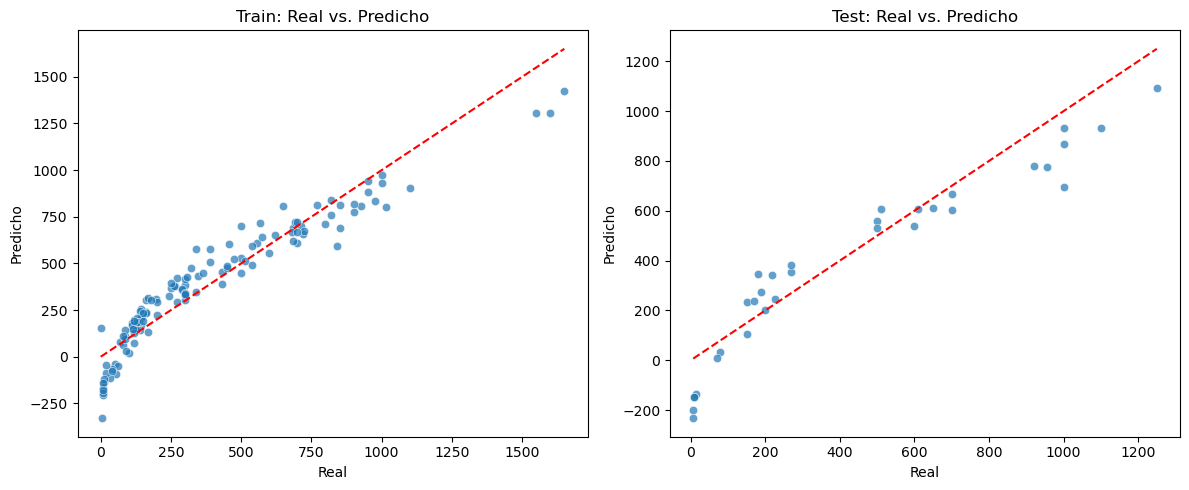

In [90]:
# ---------- Visualizaciones ---------- #

# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ols, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ols, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

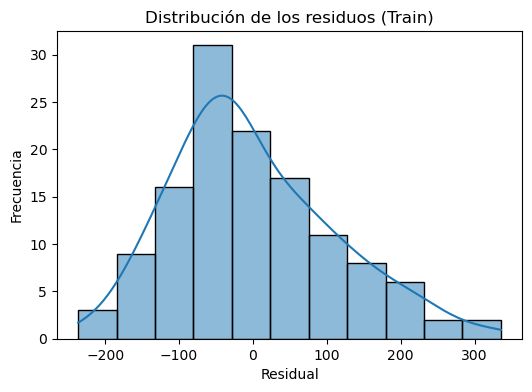

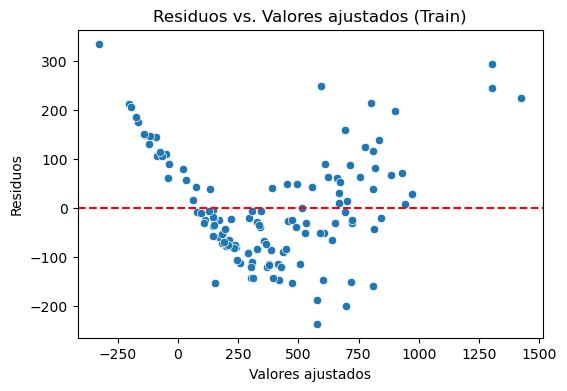

In [91]:
# 2. Distribución de residuos
residuals = y_train - y_train_pred_ols
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos (Train)")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 3. Residuos vs. Valores ajustados
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred_ols, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores ajustados (Train)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

## Parte 3. Se deja solo Length3 y Species_Pike

In [184]:
# Leer los datos
data = pd.read_csv("data/Fish.csv")

In [185]:
# Codificar la variable categórica 'Species'
species_dummies = pd.get_dummies(data['Species'], prefix='Species').astype(int)
data = data.drop('Species', axis=1)
data = pd.concat([data, species_dummies], axis=1)
data;

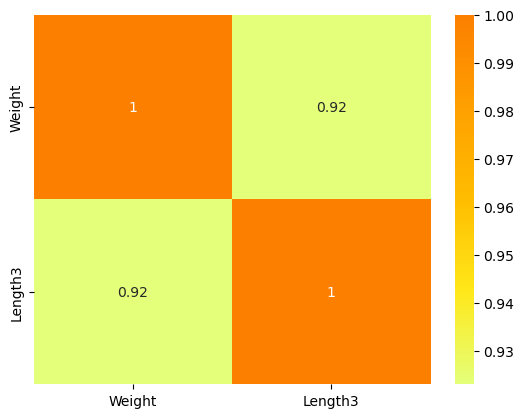

In [194]:
# correlation plot
# Vamos a mantner las columnas 'Length3', 'Width' y 'Height (si el VIF no es excesivo)'
columnas_a_conservar = ['Weight','Length3']#,'Species_Pike']
data_filtrado = data.loc[:, data.columns.isin(columnas_a_conservar)]
corr = data_filtrado.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [195]:
# Split into features and target
X = data_filtrado.drop("Weight", axis=1)
y = data_filtrado["Weight"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- OLS Regression with statsmodels ----------- #
# Add constant (intercept) for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

In [197]:
# Fit OLS model
#ols_model = sm.RLM(y_train, X_train_sm, M=sm.robust.norms.HuberT()).fit()
#ols_model=sm.OLS(y_train, X_train_sm).fit(cov_type='HC3')  # O 'HC0', 'HC1', 'HC2', etc.
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [198]:
# Summary of the model
print("\n RLM Regression Summary:")
print(ols_model.summary())


 RLM Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     719.1
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.11e-53
Time:                        14:02:49   Log-Likelihood:                -803.10
No. Observations:                 127   AIC:                             1610.
Df Residuals:                     125   BIC:                             1616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.7945     

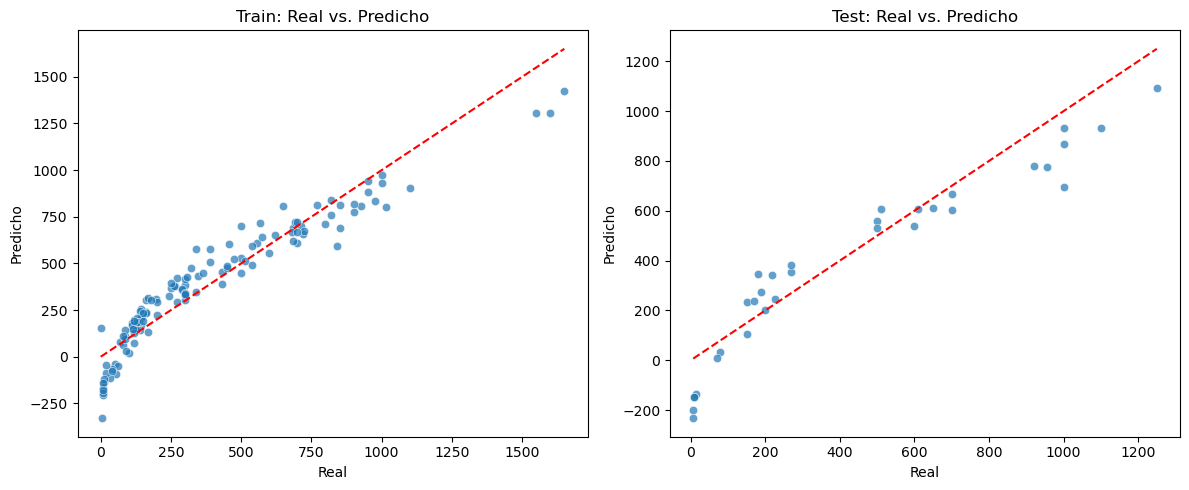

In [199]:
# ---------- Visualizaciones ---------- #

# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ols, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ols, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

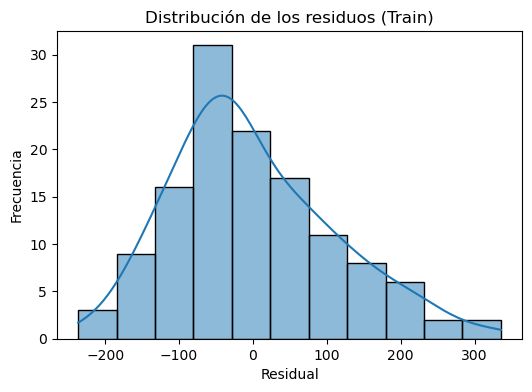

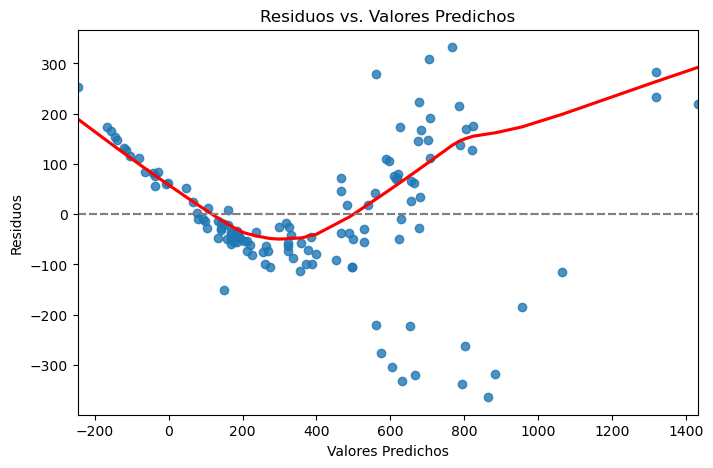

In [200]:
# 2. Distribución de residuos
residuals = y_train - y_train_pred_ols
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos (Train)")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 3. Residuos vs. Valores ajustados
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.show()

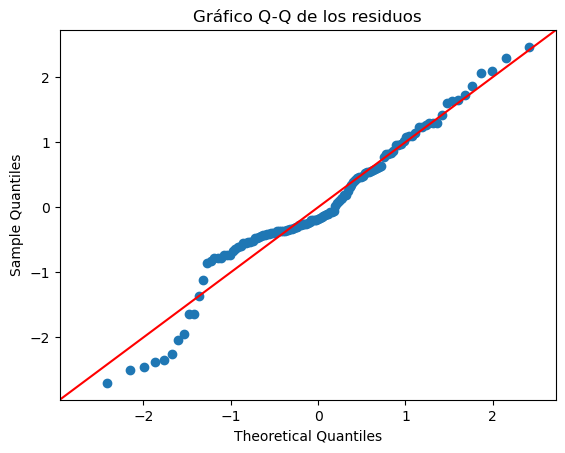

In [201]:
# 4. Q-Q PLOT (Normalidad de los residuos)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Gráfico Q-Q de los residuos")
plt.show()


# Segunda base (predicción de los precios del oro)

In [1]:
# Leer los datos
data = pd.read_csv("data/GoldUP.csv")

NameError: name 'pd' is not defined

In [2]:
data.head(2)

NameError: name 'data' is not defined

In [40]:
del data["Date"]

In [41]:
data

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...
234,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


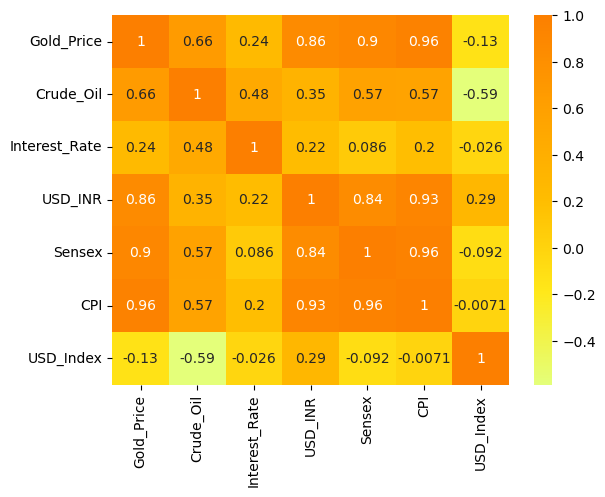

In [42]:
# correlation plot
# Vamos a mantner las columnas 'Length3', 'Width' y 'Height (si el VIF no es excesivo)'
corr = data.corr()
corr
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [43]:
data.columns

Index(['Gold_Price', 'Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI',
       'USD_Index'],
      dtype='object')

In [44]:
# Split into features and target
X = data.drop(['Gold_Price','Interest_Rate', 'USD_INR', 'Sensex','USD_Index'], axis=1)
y = data['Gold_Price']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- OLS Regression with statsmodels ----------- #
# Add constant (intercept) for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

In [46]:
# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [47]:
# Summary of the model
print("\nOLS Regression Summary:")
print(ols_model.summary())


OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             Gold_Price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1457.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          3.67e-115
Time:                        09:42:06   Log-Likelihood:                -1789.7
No. Observations:                 191   AIC:                             3585.
Df Residuals:                     188   BIC:                             3595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.921e+04    20

In [48]:
# Predicciones
y_train_pred_ols = ols_model.predict(X_train_sm)
X_test_sm = sm.add_constant(X_test_scaled)
y_test_pred_ols = ols_model.predict(X_test_sm)

In [49]:
# Métricas de evaluación
print("\nOLS Model Performance:")
print(f"Train R2: {r2_score(y_train, y_train_pred_ols):.4f}")
print(f"Test R2: {r2_score(y_test, y_test_pred_ols):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_ols):.4f}")


OLS Model Performance:
Train R2: 0.9394
Test R2: 0.9439
Test MSE: 8189491.5566


In [50]:
# Calcular VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
     Feature       VIF
0  Crude_Oil  1.497453
1        CPI  1.497453


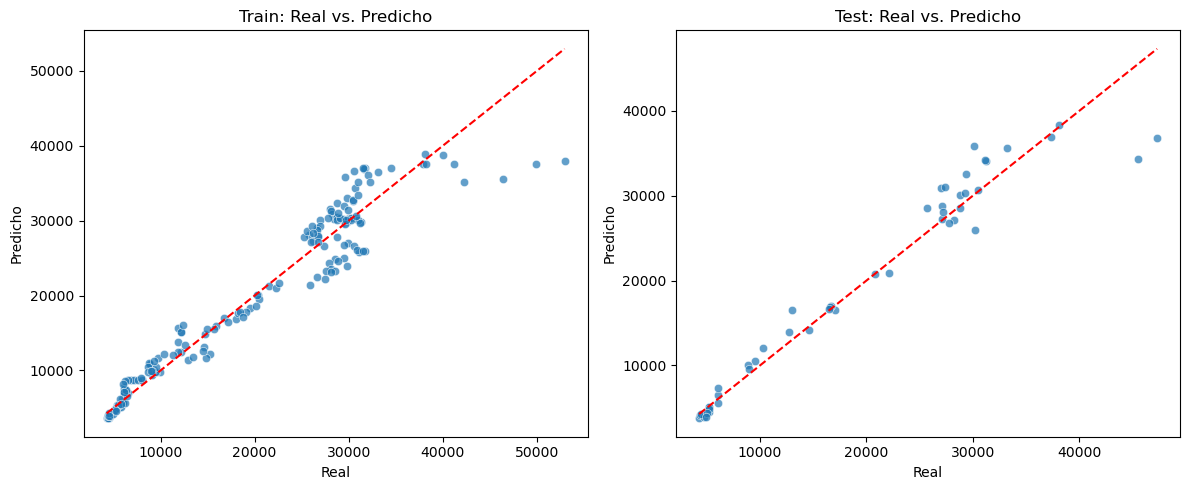

In [51]:
# ---------- Visualizaciones ---------- #

# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ols, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ols, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

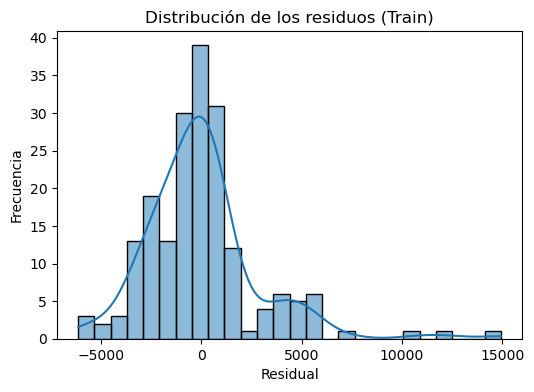

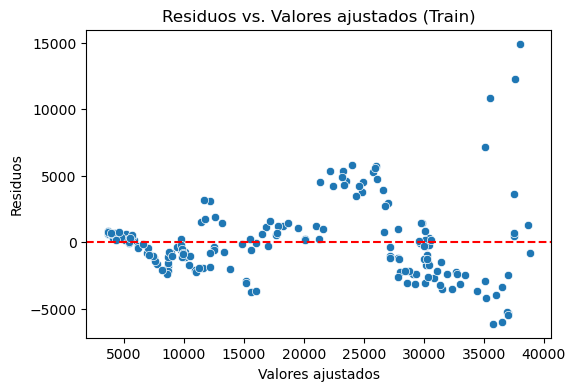

In [52]:
# 2. Distribución de residuos
residuals = y_train - y_train_pred_ols
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos (Train)")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 3. Residuos vs. Valores ajustados
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred_ols, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores ajustados (Train)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

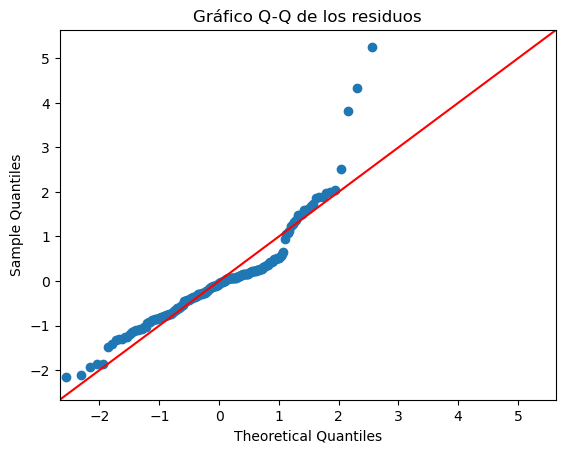

In [53]:
# 4. Q-Q PLOT (Normalidad de los residuos)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

# Aplicando log

In [54]:
# Leer los datos
data = pd.read_csv("data/GoldUP.csv")    
del data["Date"]

In [55]:
# 1. TRANSFORMACIÓN DE LA VARIABLE DEPENDIENTE
y = np.log(data['Gold_Price'])  # Transformación logarítmica aquí

In [56]:
# 2. SELECCIÓN DE VARIABLES (mantenemos CPI y Crude_Oil)
X = data[['CPI', 'Crude_Oil']]  # Selección directa de features relevantes

# Train-test split (ANTES de escalar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# 3. ESCALADO (solo variables independientes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# 4. MODELO CON VARIABLE TRANSFORMADA
X_train_sm = sm.add_constant(X_train_scaled)
ols_model_log = sm.OLS(y_train, X_train_sm).fit()  # y_train es log(Gold_Price)

print("\nOLS Regression Summary (Log-Transformed):")
print(ols_model_log.summary())


OLS Regression Summary (Log-Transformed):
                            OLS Regression Results                            
Dep. Variable:             Gold_Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1378.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          5.01e-113
Time:                        10:14:55   Log-Likelihood:                 51.775
No. Observations:                 191   AIC:                            -97.55
Df Residuals:                     188   BIC:                            -87.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [59]:
# 5. PREDICCIONES Y TRANSFORMACIÓN INVERSA
# Predicciones en escala logarítmica
y_train_pred_log = ols_model_log.predict(X_train_sm)
y_test_pred_log = ols_model_log.predict(sm.add_constant(X_test_scaled))

In [62]:
# Convertir predicciones a escala original
y_train_pred = np.exp(y_train_pred_log)
y_test_pred = np.exp(y_test_pred_log)

# 6. MÉTRICAS EN ESCALA ORIGINAL (opcional pero recomendado)
# Obtener valores reales en original (no transformados)
y_train_orig = np.exp(y_train)
y_test_orig = np.exp(y_test)

In [60]:
# Calcular VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
     Feature       VIF
0        CPI  1.497453
1  Crude_Oil  1.497453


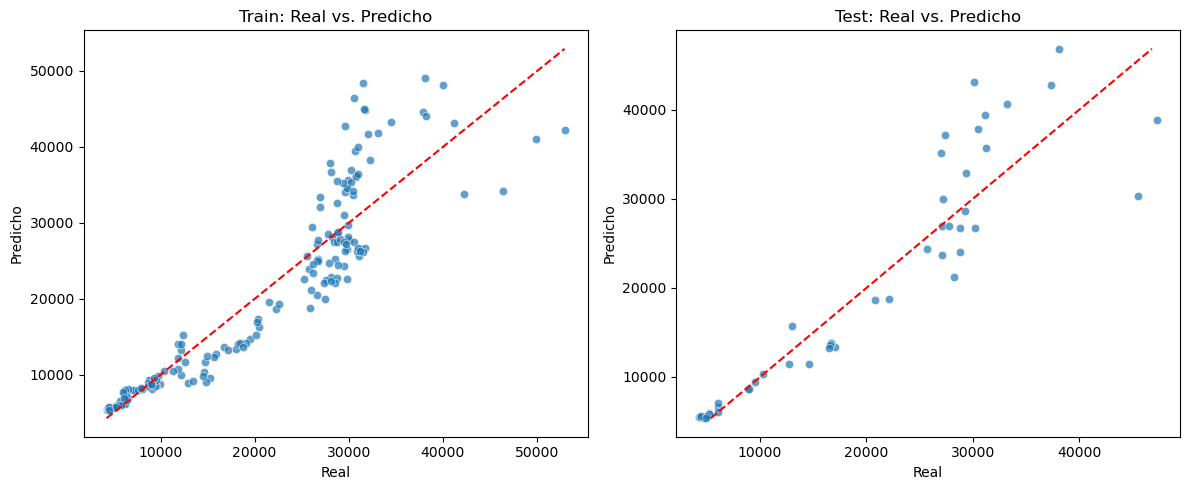

In [63]:
# ---------- Visualizaciones ---------- #

# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_orig, y=y_train_pred, alpha=0.7)
plt.plot([y_train_orig.min(), y_train_orig.max()], [y_train_orig.min(), y_train_orig.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_orig, y=y_test_pred, alpha=0.7)
plt.plot([y_test_pred.min(), y_test_pred.max()], [y_test_pred.min(), y_test_pred.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

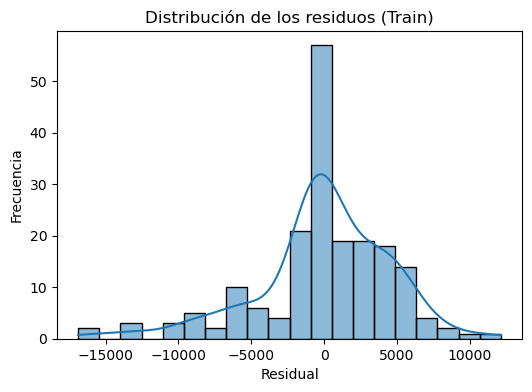

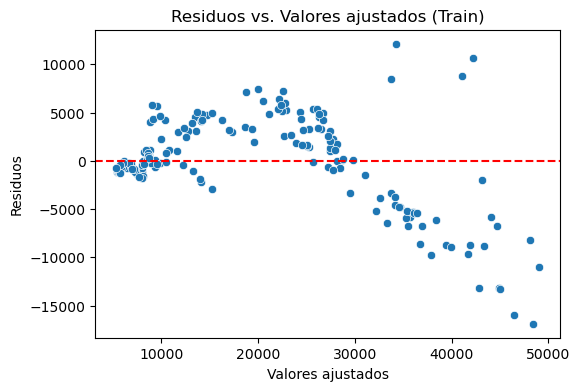

In [64]:
# 2. Distribución de residuos
residuals = y_train_orig - y_train_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos (Train)")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 3. Residuos vs. Valores ajustados
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores ajustados (Train)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

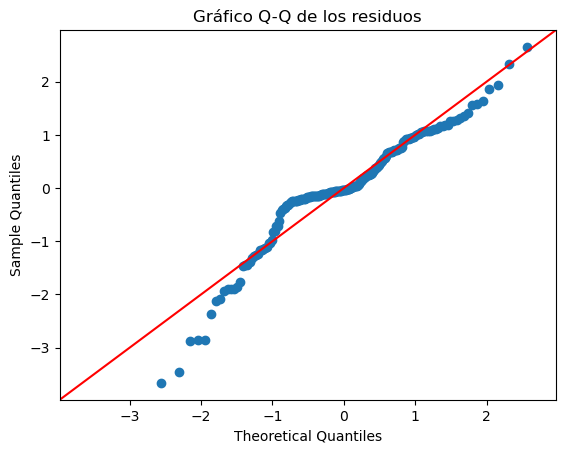

In [65]:
# 4. Q-Q PLOT (Normalidad de los residuos)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

In [68]:
# Usar índices dinámicos basados en nombres de columnas
idx_CPI = X_train.columns.get_loc('CPI')
idx_Oil = X_train.columns.get_loc('Crude_Oil')

sd_CPI = scaler.scale_[idx_CPI]
sd_Oil = scaler.scale_[idx_Oil]

# Extraer coeficientes por nombre en lugar de posición
coef_CPI = ols_model_log.params['x1']  # 'x1' es el nombre de CPI en el modelo
coef_Oil = ols_model_log.params['x2']  # 'x2' es Crude_Oil

beta_CPI_orig = coef_CPI / sd_CPI
beta_Oil_orig = coef_Oil / sd_Oil

# Calcular cambios porcentuales
cambio_pct_CPI = (np.exp(beta_CPI_orig) - 1) * 100
cambio_pct_Oil = (np.exp(beta_Oil_orig) - 1) * 100

print(f"Por 1 unidad de CPI: {cambio_pct_CPI:.4f}%")
print(f"Por 1 unidad de Crude_Oil: {cambio_pct_Oil:.4f}%")

Por 1 unidad de CPI: 1.8774%
Por 1 unidad de Crude_Oil: 0.0163%
